# LINEAR REGRESSION
<B>Objective:</B> To gets hands on experience on linear regression. 
* Cost Function for regression
* Gradient Descent, Learning rates
* Feature Normalization
* Iterative method vs Direct Method for regression
* Using scikit-learn library for regression
* How to work with categorical variables / one hot encoding

<B>Problem:</B> We will solve two set of problems 
1. Predicting house price
2. Predicting weather station maintenence request counts

# INTRODUCTION
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. Is used to predict values within a continuous range. (e.g. sales, price) 

<b>Simple Regression:</b> Simple linear regression uses traditional slope-intercept form, where $m$ and $b$ are the variables our algorithm will try to “learn” to produce the most accurate predictions. $x$ represents our input data and $y$ represents our prediction.

$$\hat {y}=\theta_{1}x+\theta_{0}$$

In order to compute the values of $m$ and $b$ we need to minimize a cost function. In the case of Linear Regression it is given by

$$J(\theta) = \frac{1}{2m}\sum_{i=i}^{m}(\hat {y}_{i}-y_{i})^{2}$$

<img src='./images/lr.jpg'>

In multivariate regression we seek a set of parameters 

$$\textbf{$\Theta$} = [\theta_{0} \quad \theta_{1} \quad \cdots \quad \theta_{i} \quad \cdots \quad \theta_{m}]^{T}$$
               
which minimizes the the cost function:
Hypothesis 
$\textbf{H}=\textbf{X $\Theta$}$

Cost function is

$$\textbf{J($\Theta$)}=\frac{1}{2m}(\textbf{X$\Theta$} -\textbf{Y})^{T}(\textbf{X$\Theta$} -\textbf{Y})$$

The advantages of Linear Regression are that they computationally efficient, simple and easy to interpret. However, the algorithm fails to capture non-linear behavior.


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import datasets,linear_model

# Loading the data from a csv file
The columns represent the surface area, number of rooms and the price of the apartment. 

In [2]:
data = np.loadtxt('./data/housing_data.csv', delimiter=",")
X = data[:,:2]
y = data[:,2]
m = len(y)

# Data Exploration
Plot the data and have a look
Note the large difference in the scale of "number of room variables" and "surface area". 
* "Number of room" has a range [1.0,5.0]
* "Surface area" has a range [500,4500]

This causes problems during the cost minimization step (gradient descent).

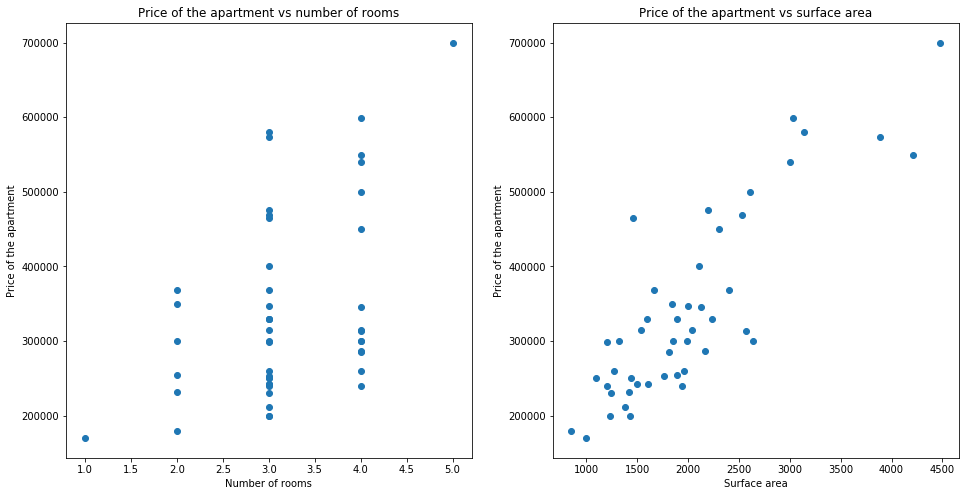

In [3]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.scatter(X[:,1],y)
plt.xlabel("Number of rooms")
plt.ylabel("Price of the apartment")
plt.title("Price of the apartment vs number of rooms")
plt.subplot(122)
plt.scatter(X[:,0],y)
plt.xlabel("Surface area")
plt.ylabel("Price of the apartment")
plt.title("Price of the apartment vs surface area")
plt.show()

# Feature normalization. 
The input feature vectors are normalized so that they have comparable scales.Here we do so by subtracting the mean and dividing by the standard deviation.

In [4]:
# Normalize features
def featureNormalize(X):
    X_norm = X.copy()
    mu    = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    for i in range(X.shape[1]):
        mu[:,i] = np.mean(X[:,i])
        sigma[:,i] = np.std(X[:,i])
        X_norm[:,i] = (X[:,i] - float(mu[:,i]))/float(sigma[:,i])
    return X_norm, mu, sigma

In [5]:
X_norm, mu, sigma = featureNormalize(X)

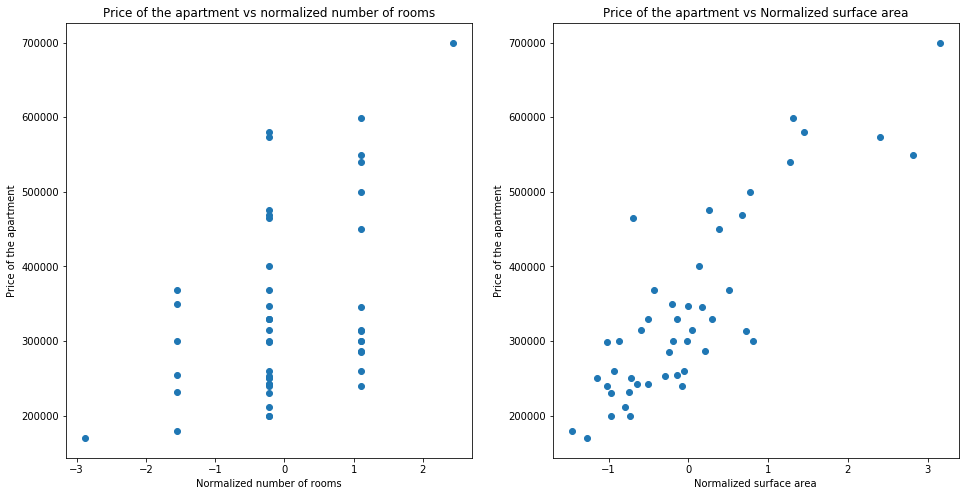

In [6]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.scatter(X_norm[:,1],y)
plt.xlabel("Normalized number of rooms")
plt.ylabel("Price of the apartment")
plt.title("Price of the apartment vs normalized number of rooms")
plt.subplot(122)
plt.scatter(X_norm[:,0],y)
plt.xlabel("Normalized surface area")
plt.ylabel("Price of the apartment")
plt.title("Price of the apartment vs Normalized surface area")
plt.show()

# Bias Term
We simply add a column vector of 1.

In [7]:
X_padded = np.column_stack((np.ones((m,1)), X_norm))

# Cost Function involving multiple variables
$$\textbf{J($\Theta$)}=\frac{1}{2m}(\textbf{X$\Theta$} -\textbf{Y})^{T}(\textbf{X$\Theta$} -\textbf{Y})$$

In [8]:
def computeCost(X,y,theta): 
  m=len(y)
  Cost=0.0;
  Cost=1.0/2.0/m*np.sum((X.dot(theta)-y)**2);
  return Cost;

# Batch Gradient Descent
Minimize the loss function using gradient descent. 
<img src='images/gd.jpg'>

In [9]:
def gradientDescent(X, y, alpha, num_iters):
    m,n = X.shape
    theta = np.zeros((X.shape[1],1))
    Cost_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        theta = theta - alpha*(1.0/m) * np.transpose(X).dot(X.dot(theta) - np.transpose([y]))    
        Cost_history[i] = computeCost(X, y, theta)
    return theta, Cost_history

In [10]:
def SolveGradientDescent(X,y,alpha, num_iters):
    m,n=X.shape
    theta, Loss_history = gradientDescent(X, y, alpha, num_iters)
    plt.plot(range(Loss_history.size), Loss_history, "-b", linewidth=2 )
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.show(block=False)
    theta.shape
    return theta

# Evolution of the cost function
Try solving the same problem but without feature normalization and convince yourself the importance of the step.

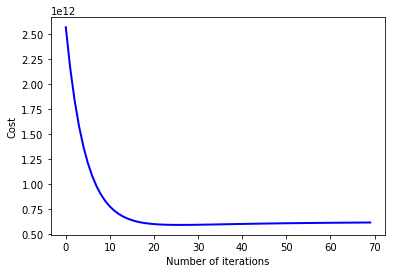

Theta computed from gradient descent:  [[ 340199.36423635  106961.59217624   -4092.86897639]]


In [11]:
#y=y.reshape(-1,1)
theta_GD=SolveGradientDescent(X=X_padded,y=y,alpha=0.1,num_iters=70)
print('Theta computed from gradient descent: ',theta_GD.T)


# Make predictions using the trained model
Remember that the input features were normalized so we need to do the same with the new input features on which we want to make make predictions.

In [12]:
house_norm_padded = np.array([1, (1650-mu[0,0])/sigma[0,0], (3-mu[0,1])/sigma[0,1]])
price_GD = np.array(house_norm_padded).dot(theta_GD)
print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):", price_GD)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): [ 293415.1732852]


# Interpretability of the model
The weights computed above corresponds to the normalized features and is given by.
$\hat{y}=\theta_{0}+\theta_{1}(\frac{x_{1}-\mu_{1}}{\sigma_{1}})+\theta_{2}(\frac{x_{2}-\mu_{2}}{\sigma_{2}})$

To interpret the model we should look at the weights corresponding to the actual features.
$\hat{y}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}$, then the coefficients will be as follows

In [14]:
theta_GD[0]-mu[0,0]/sigma[0,0]-mu[0,1]/sigma[0,1],theta_GD[1]/sigma[0,0],theta_GD[1]/sigma[0,1]

(array([ 340192.60850789]), array([ 136.04837942]), array([ 142076.92613751]))

What is your conclusion from the comparison of the weights ?